In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 76.56984566646726
Iteration 2, RMSE: 86.93886485867333
Iteration 3, RMSE: 72.91093406837633
Iteration 4, RMSE: 120.83213316145755
Iteration 5, RMSE: 198.16626496849472
Iteration 6, RMSE: 129.85184266140965
Iteration 7, RMSE: 129.6869184438948
Iteration 8, RMSE: 236.78904226780367
Iteration 9, RMSE: 119.32839389792763
Iteration 10, RMSE: 119.79431248003995
Iteration 11, RMSE: 148.04772780416377
Iteration 12, RMSE: 101.96198589512026
Iteration 13, RMSE: 163.41722298651894
Iteration 14, RMSE: 209.47318058850803
Iteration 15, RMSE: 110.5480591583075
Iteration 16, RMSE: 215.05640921596628
Iteration 17, RMSE: 215.2011198912519
Iteration 18, RMSE: 116.34499154681727
Iteration 19, RMSE: 133.6082016693143
Iteration 20, RMSE: 219.8476450237488
Iteration 21, RMSE: 123.81055180444982
Iteration 22, RMSE: 157.1818983345299
Iteration 23, RMSE: 197.46172206920613
Iteration 24, RMSE: 133.3005001241256
Iteration 25, RMSE: 195.68265659361424
Iteration 26, RMSE: 195.2057205480287
Iterat

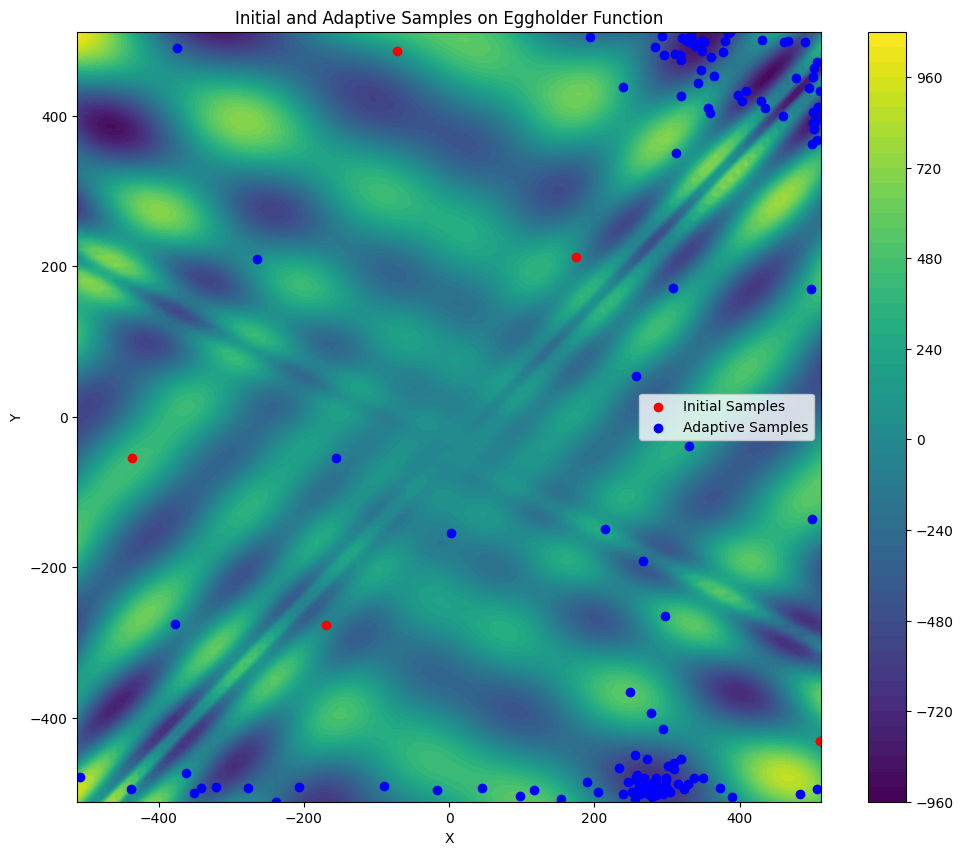

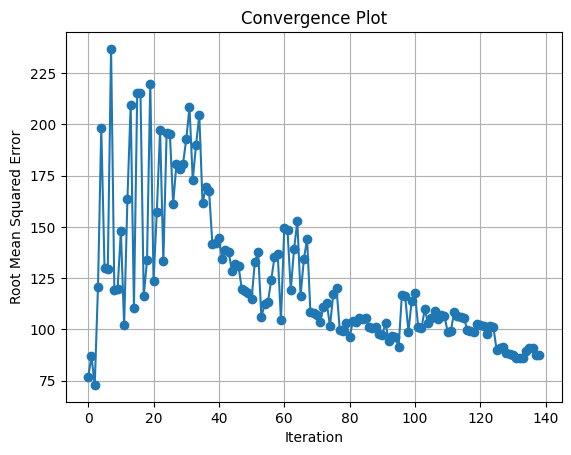

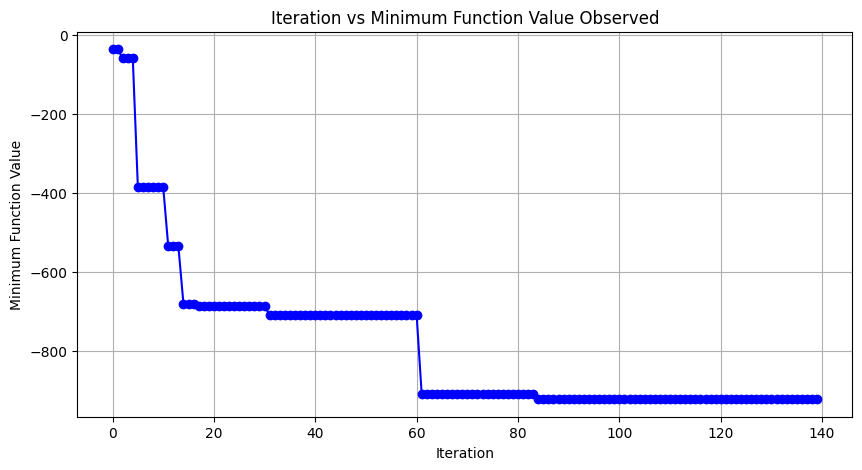

Best observed function value after active learning: -921.5852974700408
              X           Y
0   -437.120922  -54.810243
1   -169.100139 -277.601145
2    174.840960  212.012731
3    510.134569 -430.940653
4    -71.305491  486.213757
..          ...         ...
140  500.204703  390.438021
141  495.210428  437.607995
142  291.997623 -491.245786
143  383.501637  510.294535
144  383.501637  510.294535

[145 rows x 2 columns]


In [3]:
# Generate a mesh for the background function
X, Y, Z = samplers.Sampler.generate_mesh([(-512, 512), (-512, 512)], num_points=100, function=ex_func.eggholder)

# Generate initial samples
sampler = samplers.LatinHypercubeSampling(ex_func.eggholder)
initial_points = sampler.sample(num_samples=5, ranges = [(-512, 512), (-512, 512)] )
initial_values = np.array([ex_func.eggholder([x, y]) for x, y in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, [(-512, 512), (-512, 512)], 3)

# Plot the results
sampling_vis = gen_def.SamplingVisualization2D(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results(X, Y, Z, "Eggholder")